## Greedy search #2

{'Pearlescent Blue': {'rgb': [0.3137254901960784, 0.5058823529411764, 0.6901960784313725], 'alpha': np.float64(0.04998931898973191)}, 'Perfect Orange': {'rgb': [0.9490196078431372, 0.45098039215686275, 0.19215686274509805], 'alpha': np.float64(0.06449301496838222)}, 'Gun Metal Gray': {'rgb': [0.30980392156862746, 0.33725490196078434, 0.35294117647058826], 'alpha': np.float64(0.24852270692471412)}, 'Turquoise': {'rgb': [0.06274509803921569, 0.6, 0.5803921568627451], 'alpha': np.float64(0.18126924692201818)}, 'Hi-Flow Light Gray': {'rgb': [0.6470588235294118, 0.6509803921568628, 0.6392156862745098], 'alpha': np.float64(0.3296799539643607)}, 'Amethyst Violet': {'rgb': [0.5882352941176471, 0.27058823529411763, 0.48627450980392156], 'alpha': np.float64(0.004301068623984494)}}
Pearlescent Blue
62.710316006402266
Perfect Orange
95.42138561090349
Gun Metal Gray
53.84721632178211
Turquoise
26.95652142711791
Hi-Flow Light Gray
43.82371507967372
Amethyst Violet
92.18715541072548


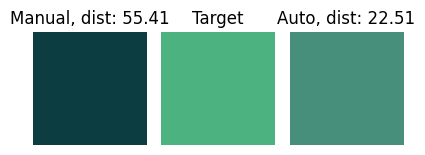

['Pearlescent Blue', 'Pearlescent Blue', 'Pearlescent Blue', 'Turquoise', 'Turquoise']


C:\Users\Matyanson\AppData\Local\Temp\ipykernel_13044\1718745621.py:142: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = plt.Rectangle(


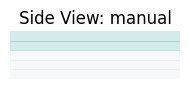

['Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect Orange', 'Perfect 

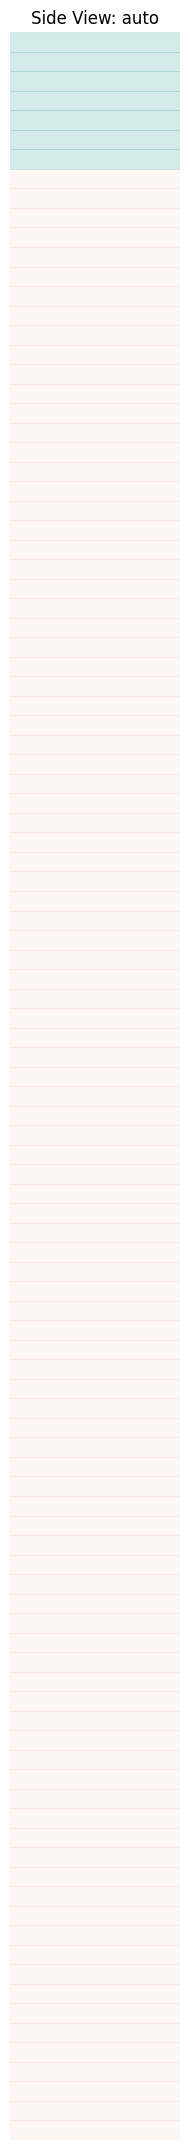

In [2]:
import numpy as np
from skimage import color
import matplotlib.pyplot as plt

# --- UTILITY FUNCTIONS ---
def clamp(lb, ub, val):
    return min(max(lb, val), ub)

def rgb_to_lab(rgb):
    rgb = np.array(rgb).reshape(1, 1, 3)
    lab = color.rgb2lab(rgb)
    return lab[0, 0]

def lab_to_rgb(lab):
    lab = np.array(lab).reshape(1, 1, 3)
    rgb = color.lab2rgb(lab)
    return rgb[0, 0]

def alpha_from_td(thickness, td):
    """
    Convert thickness (mm) and transmission distance (mm) to an opacity:
      alpha = 1 - exp(-thickness / td)
    """
    return 1 - np.exp(-thickness / td)

def composite_over(base_rgb, top_rgb, top_alpha):
    base_rgb = np.array(base_rgb, dtype=np.float64)
    top_rgb = np.array(top_rgb, dtype=np.float64)

    return top_alpha * top_rgb + (1 - top_alpha) * base_rgb

def color_distance(rgb1, rgb2):
    rgb1 = np.array(rgb1).reshape(1, 1, 3)
    rgb2 = np.array(rgb2).reshape(1, 1, 3)
    lab1 = color.rgb2lab(rgb1)
    lab2 = color.rgb2lab(rgb2)

    # Euclidean distance in LAB space
    return np.linalg.norm(lab1 - lab2)


# --- GLOBAL ---
filaments = {
    'Pearlescent Blue': {
        'rgb': [0.3137254901960784, 0.5058823529411764, 0.6901960784313725],
        'td': 3.9,   # Transmission Distance in mm
    },
    'Perfect Orange': {
        'rgb': [0.9490196078431372, 0.45098039215686275, 0.19215686274509805],
        'td': 3.0,
    },
    'Gun Metal Gray': {
        'rgb': [0.30980392156862746, 0.33725490196078434, 0.35294117647058826],
        'td': 0.7,
    },
    'Turquoise': {
        'rgb': [0.06274509803921569, 0.6, 0.5803921568627451],
        'td': 1.0,
    },
    'Hi-Flow Light Gray': {
        'rgb': [0.6470588235294118, 0.6509803921568628, 0.6392156862745098],
        'td': 0.5,
    },
    'Amethyst Violet': {
        'rgb': [0.5882352941176471, 0.27058823529411763, 0.48627450980392156],
        'td': 46.4,
    },
}

layer_thickness = 0.2  # mm per layer
base_color = [0.0, 0.0, 0.0] # [0.5, 0.5, 0.5]  # white background
target_color = [0.0, 0.5, 0.5]  # custom teal
target_color = [0.3, 0.7, 0.5]


# --- SETUP ---
colors = {} # {"rgb", "alpha"}
for f_name, f in filaments.items():
    rgb = f['rgb']
    td = f['td']
    alpha = alpha_from_td(layer_thickness, td)
    colors[f_name] = {
        "rgb": rgb,
        "alpha": alpha
    }

print(colors)

# 6) Blend layer by layer using TD-based alpha
def blend_layers(layers):
    current_rgb = np.array(base_color, dtype=float)
    for i, name in enumerate(layers, start=1):
        rgb = np.array(colors[name]['rgb'], dtype=float)
        alpha = colors[name]['alpha']
        current_rgb = composite_over(current_rgb, rgb, alpha)

    return current_rgb


def blend_layers_alpha(layers):
    current_rgb = np.array([0.0, 0.0, 0.0], dtype=float)
    current_alpha = 0.0

    for name in layers:
        rgb = np.array(colors[name]['rgb'], dtype=float)
        alpha = float(colors[name]['alpha'])

        current_rgb = rgb * alpha + current_rgb * (1 - alpha)
        current_alpha = alpha + current_alpha * (1 - alpha)
    
    return [current_rgb / current_alpha, current_alpha]

# 7) Show a side-by-side comparison of blended vs. target
def print_comparasion(rgb1, rgb2):

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(4, 2))
    dist1 = round(color_distance(rgb1, target_color), 2)
    ax1.imshow(np.ones((10,10,3)) * rgb1.reshape((1,1,3)))
    ax1.set_title(f"Manual, dist: {dist1}")

    ax2.imshow(np.ones((10,10,3)) * np.array(target_color).reshape((1,1,3)))
    ax2.set_title("Target")
    
    dist2 = round(color_distance(rgb2, target_color), 2)
    ax3.imshow(np.ones((10,10,3)) * rgb2.reshape((1,1,3)))
    ax3.set_title(f"Auto, dist: {dist2}")

    for ax in (ax1, ax2, ax3):
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# 8) Visualize each layer from the side with uniform thickness
def visualize_stack(stack, title):
    print(stack)
    total_thickness = layer_thickness * len(stack)
    fig2, ax2 = plt.subplots(figsize=(2, total_thickness))
    y_bottom = 0
    for i, name in enumerate(stack, start=1):
        rgb = colors[name]['rgb']
        alpha = colors[name]['alpha']
        rect = plt.Rectangle(
            (0, y_bottom), 1, layer_thickness,
            color=(rgb[0], rgb[1], rgb[2], alpha),
            edgecolor='black',
            linewidth=0.5
        )
        ax2.add_patch(rect)
        y_bottom += layer_thickness

    ax2.set_xlim(0, 1)
    ax2.set_ylim(0, total_thickness)
    ax2.set_aspect('auto')
    ax2.axis('off')
    ax2.set_title(title)

    plt.tight_layout()
    plt.show()

def dynamic_stack_to_stack(dynamic_stack):
    stack = []
    for c in dynamic_stack:
        count = c['count']
        name = c['name']
        stack = stack + [name] * count

    return stack

def get_dynamic_stack_score(dynamic_stack):
    stack = dynamic_stack_to_stack(dynamic_stack)
    blend = blend_layers(stack)
    dist = color_distance(blend, target_color)
    return dist



def get_stack(max_layers):

    # sort colors to how close they are to the target
    def color_score(c):
        rgb = colors[c]['rgb']
        print(c)
        score = color_distance(rgb, target_color)
        print(score)
        return score
    
    color_pool = list(colors.keys())
    color_pool.sort(key=color_score, reverse=True)

    # create dynamic stack
    dynamic_stack = []
    for c in color_pool:
        dynamic_stack.append(
            {
                "name": c,
                "count": 1
            }
        )
    
    # itteratively make changes and check
    best_dist = get_dynamic_stack_score(dynamic_stack)
    for i in range(100):
        for c in dynamic_stack:
            count = c['count']
            # minus
            if(count > 0):
                c['count'] -= 1
            # check
            dist = get_dynamic_stack_score(dynamic_stack)
            if(dist < best_dist):
                best_dist = dist
                continue
            else:
                c['count'] = count
            # plus
            c['count'] += 1
            # check
            dist = get_dynamic_stack_score(dynamic_stack)
            if(dist < best_dist):
                best_dist = dist
                continue
            else:
                c['count'] = count
    
    stack = dynamic_stack_to_stack(dynamic_stack)

    return stack

    

            
    
            
            
    


def get_stack_potential(stack):

    rgb, alpha = blend_layers_alpha(stack)

    min_color = composite_over([0.0, 0.0, 0.0], rgb, alpha)
    max_color = composite_over([1.0, 1.0, 1.0], rgb, alpha)

    center_color = [
        (min_color[0] + max_color[0]) * 0.5,
        (min_color[1] + max_color[1]) * 0.5,
        (min_color[2] + max_color[2]) * 0.5,
    ]


    center_dist = color_distance(center_color, target_color)

    
    color_dist = color_distance(rgb, target_color)
    closest_color = [
        clamp(min_color[0], max_color[0], target_color[0]),
        clamp(min_color[1], max_color[1], target_color[1]),
        clamp(min_color[2], max_color[2], target_color[2]),
    ]
    closest_dist = color_distance(closest_color, target_color)

    return [color_dist, closest_dist, center_dist]








# --- DO STUFF ---



stack_auto = get_stack(5)
stack_manual = ['Pearlescent Blue'] * 3 + ['Turquoise'] * 2

blended_manual = blend_layers(stack_manual)
blended_auto = blend_layers(stack_auto)

print_comparasion(blended_manual, blended_auto)

visualize_stack(stack_manual, "Side View: manual")
visualize_stack(stack_auto, "Side View: auto")